# EXPLORATORY DATA ANALYSIS

In [1]:
#import the required packages for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

C:\Users\Aman saini\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('F:/r file/project/GlobalTerrosim/Terror.csv')

C:\Users\Aman saini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,5,50,51,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(1)

,Year,Month,Day,approxdate,extended,resolution,Country,Region,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,Alternative,multiple,success,suicide,corp1,corp2,corp3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claim2,claim3,compclaim,weapdetail,nkillter,nwoundte,property,PropeRXtent,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,GroupSubName,GroupName,WeponType,WeponSubType,AttackType,Target,TargetSubType,TargetType,Nationality,TotalCasuality,ClaimMode,LattiMiss,LongiMiss,city_miss
0,1970,7,2,NaN,0,NaN,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,0.0,1,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,nan nan nan,MANO-D nan nan,Unknown nan nan nan,nan nan nan nan,Assassination nan nan,Julio Guzman nan nan,Named Civilian nan nan,Private Citizens & Property nan nan,Dominican Republic nan nan,NaN,nan nan nan,0,0,0.0


### TERRIORIST ACTIVITY PER YEAR

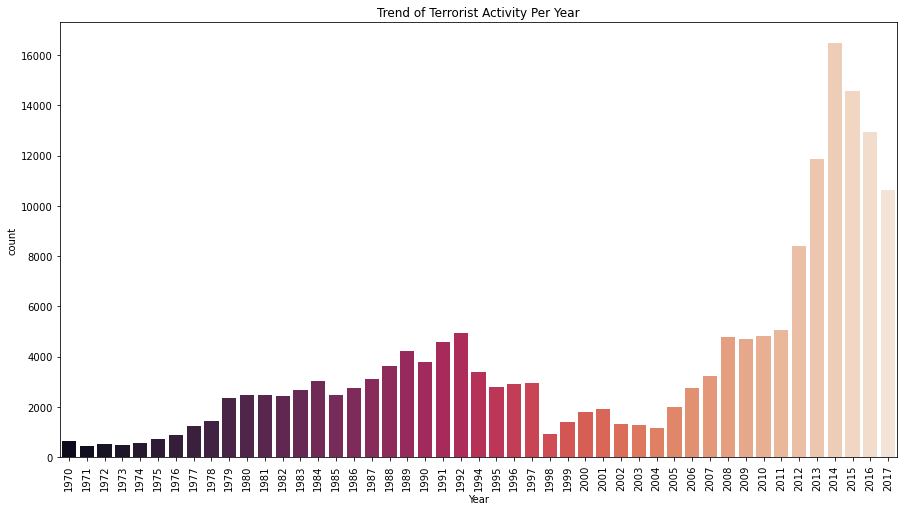

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(x='Year',data=df,palette='rocket')
plt.title('Trend of Terrorist Activity Per Year')
plt.xticks(rotation=90)
plt.show()

Seems like terriorist activity after 2014 is decreasing constantly.

### TOP 15 AFFECTED COUNTRY BY TERRORIST ACTIVITY 

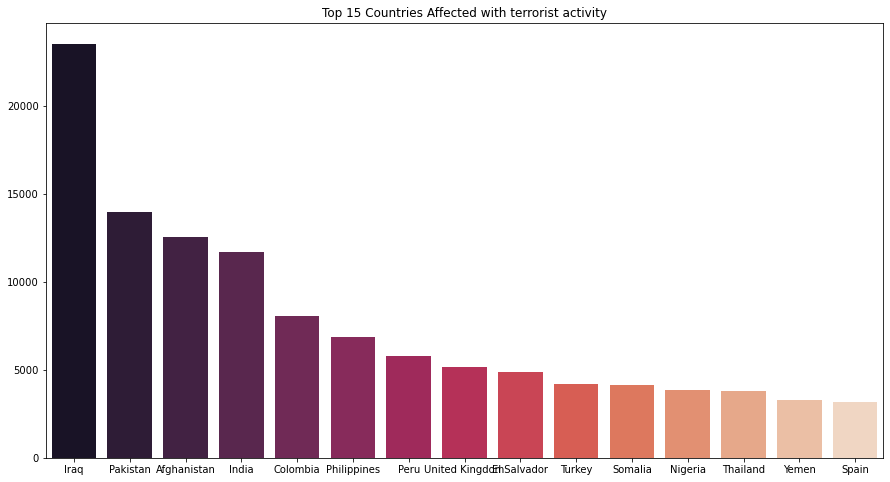

In [5]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Country'].value_counts()[:15].index,y=df['Country'].value_counts()[:15].values,palette='rocket')
plt.title('Top 15 Countries Affected with terrorist activity')
plt.show()

Seems like Iraq is the one which was affected the most with terriorist activity then Pakistan and so on .

### TOTAL NUMBER OF CASUALITY IN TERMS  OF COUNTRY

In [6]:
df['TotalCasuality'].isnull().sum()
df['TotalCasuality'].fillna(0,inplace=True)

In [7]:
# lets make the use of pivot_table from pandas library to group total number of casuality with country wise.

pivot_TotCasuality=pd.pivot_table(data=df,index='Country',values='TotalCasuality',aggfunc='sum').sort_values(by='TotalCasuality',ascending=False)

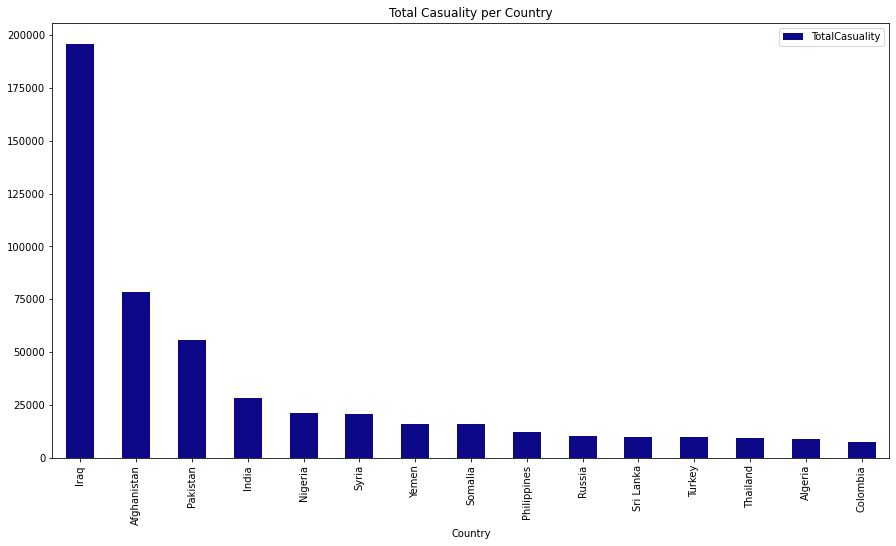

In [8]:
pivot_TotCasuality[:15].plot(kind='bar',colormap='plasma',figsize=(15,8))
plt.title('Total Casuality per Country')
plt.show()

Seems like Iraq is the one which was affected the most with terriorist activity then Pakistan and so on .

### ATTACK VS KILL

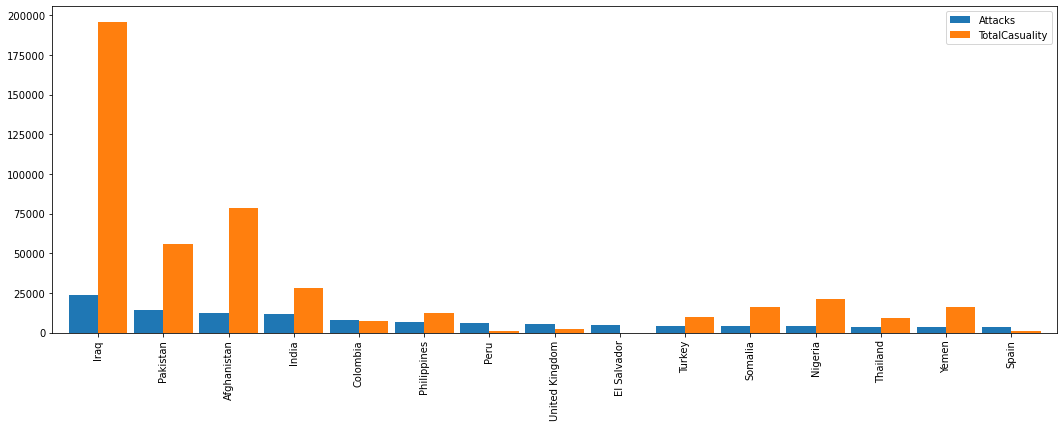

In [9]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['TotalCasuality'].sum().to_frame()

coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### TOP 15 TARGET TYPE USED FOR ATTACK

In [10]:
def clean_targetText(text):
    text=re.sub(r'nan','',text)
    text=re.sub(r'Unknown','blank',text)
    return (text)

In [11]:
target=pd.Series(df['Target'])
target=target.apply(lambda x : clean_targetText(x))
target=pd.DataFrame(target.value_counts())
target.drop(labels='blank  ',inplace=True)

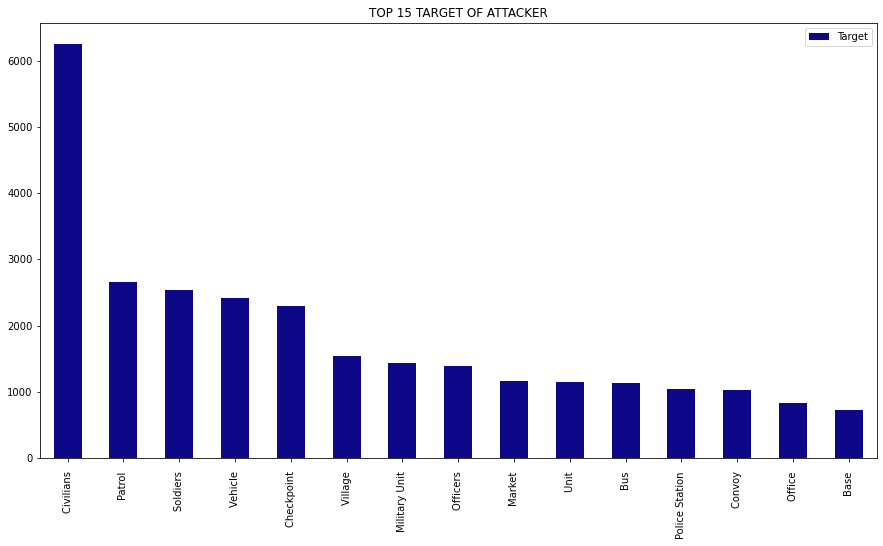

In [12]:
target[:15].plot(kind='bar',figsize=(15,8),title='TOP 15 TARGET OF ATTACKER',colormap='plasma')
plt.show()

Damn!! Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq. Thus the densely populated theory holds good.

### WEAPON DETAIL USE IN ATTACK

In [13]:
def gen_freq(text):
    # will store the list of words
    word_list=[]
    #Loop over all the weapons to extract the word from sentences
    for tw_words in text.split():
        word_list.extend(tw_words)
        
    # Creating the word frequency from the word_list
    word_freq=pd.Series(word_list).value_counts()
    
    return (word_freq)

In [14]:
wep_detail=df['weapdetail'].dropna()
freq=gen_freq(wep_detail.str)

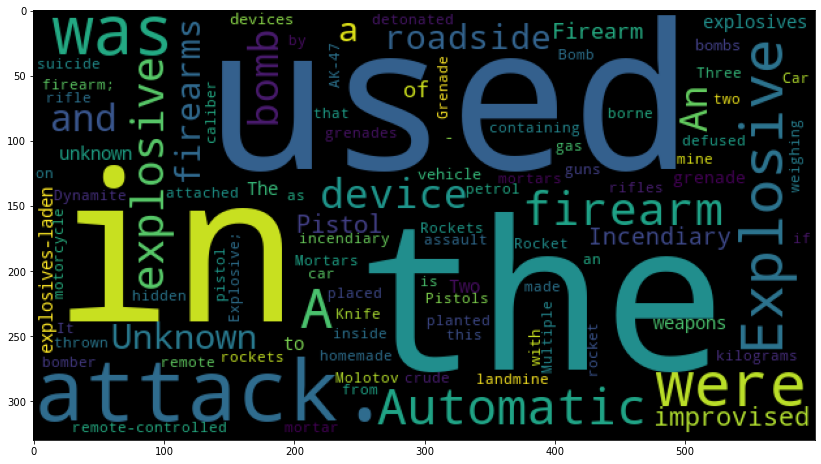

In [15]:
wc=WordCloud(width=600,height=330,max_words=100).generate_from_frequencies(freq)
plt.figure(figsize=(14,8))
plt.imshow(wc)
plt.show()

Seems like there are noise in the form of stopwords like ',' ,'.' and so on which need to be removed from that to get exact weapon name

In [16]:
# Lets make the use of regular exp to clean the text

def clean_text(text):
    #Remove used
    text=re.sub(r'used','',text)
    # Remove attack
    text=re.sub(r'attack','',text)
    # Remove Unknown
    text=re.sub(r'Unknown','',text)
    # Remove device
    text=re.sub(r'device','',text)
    # Remove nan
    text=re.sub(r'nan','',text)
    
    # Remove punctuation
    text=re.sub(r'[?!.;:,#@-]','',text)
    
    
    # Convert into lowercase to maitain consistency
    text=text.lower()
    
    return text

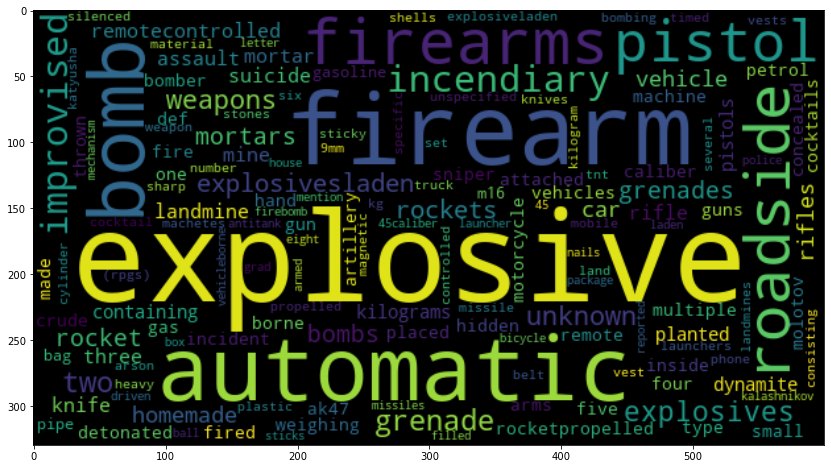

In [17]:
stop_words=set(stopwords.words('english'))
text=wep_detail.apply(lambda x:clean_text(x))

freq=gen_freq(text.str)*100
freq=freq.drop(labels=stop_words,errors='ignore')
#Genrate word cloud
wc=WordCloud(width=600,height=330,max_words=150,).generate_from_frequencies(freq)

plt.figure(figsize=(16,8))
plt.imshow(wc,interpolation='bilinear')
plt.show()

Seems like some most common weapons like 'firearm', 'explosive', 'pistol', 'bomb'  use to accomplish the activity.

### MOST COMMON GROUP INVOLVED IN ATTACK

In [18]:
grp_name=df['GroupName']
freq_gname=gen_freq(grp_name.str)

In [19]:
freq_gname[:15]

nan           350218
Unknown        80396
of             19660
Liberation     12517
Army           10578
the            10435
Islamic         9377
Front           9036
National        8674
and             7913
Taliban         7411
State           7001
Iraq            6078
People's        5396
Levant          5279
dtype: int64

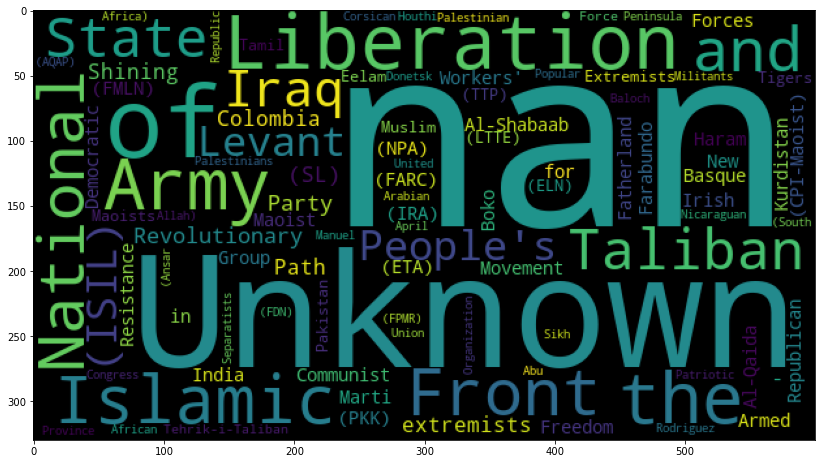

In [20]:
wc=WordCloud(width=600,height=330,max_words=100).generate_from_frequencies(freq_gname)
plt.figure(figsize=(14,8))
plt.imshow(wc)
plt.show()

Seems like there are some noise in the form of 'nan','Unknown' which needs to be remove to get deep insight

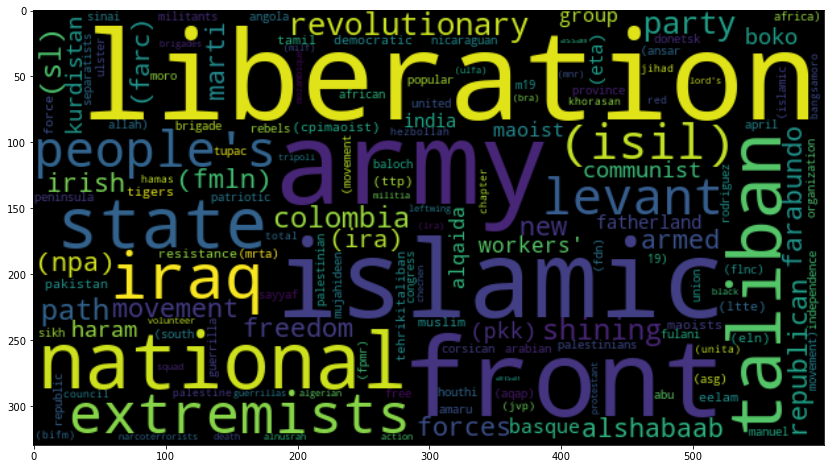

In [21]:
stop_words=set(stopwords.words('english'))
text=grp_name.apply(lambda x:clean_text(x))

freq=gen_freq(text.str)*100
freq=freq.drop(labels=stop_words,errors='ignore')
#Genrate word cloud
wc=WordCloud(width=600,height=330,max_words=150,).generate_from_frequencies(freq)

plt.figure(figsize=(16,8))
plt.imshow(wc,interpolation='bilinear')
plt.show()

Seems like most common name involved is 'liberation' , 'taliban' , 'islamic'.

### CONCLUSION

* Increase the security at the border side from where terrorist enters. 

* Stepping up the Exchange of information 

 * As seen above the more probablity of attack is where population is highly dense which need to be take care by updgrading security sytem in these area.Major example is iraq as seen above. 